# Predicting loan signup 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('C:/Users/SIDY BOY!/Desktop/UTD/Projects/practicing ML/P39-Financial-Data.csv')

In [4]:
df

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [5]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [6]:
df.head

<bound method NDFrame.head of        entry_id  age  pay_schedule  home_owner  income  months_employed  \
0       7629673   40     bi-weekly           1    3135                0   
1       3560428   61        weekly           0    3180                0   
2       6934997   23        weekly           0    1540                6   
3       5682812   40     bi-weekly           0    5230                0   
4       5335819   33  semi-monthly           0    3590                0   
...         ...  ...           ...         ...     ...              ...   
17903   9949728   31       monthly           0    3245                0   
17904   9442442   46     bi-weekly           0    6525                0   
17905   9857590   46        weekly           0    2685                0   
17906   8708471   42     bi-weekly           0    2515                0   
17907   1498559   29        weekly           1    2665                0   

       years_employed  current_address_year  personal_account_m  \
0 

### eda

In [7]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [8]:
df.isna().sum().value_counts
#df.isna().any()

<bound method IndexOpsMixin.value_counts of entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64>

In [9]:
df_temp= df.drop(columns=['entry_id','pay_schedule','e_signed'])

In [10]:
#histograms

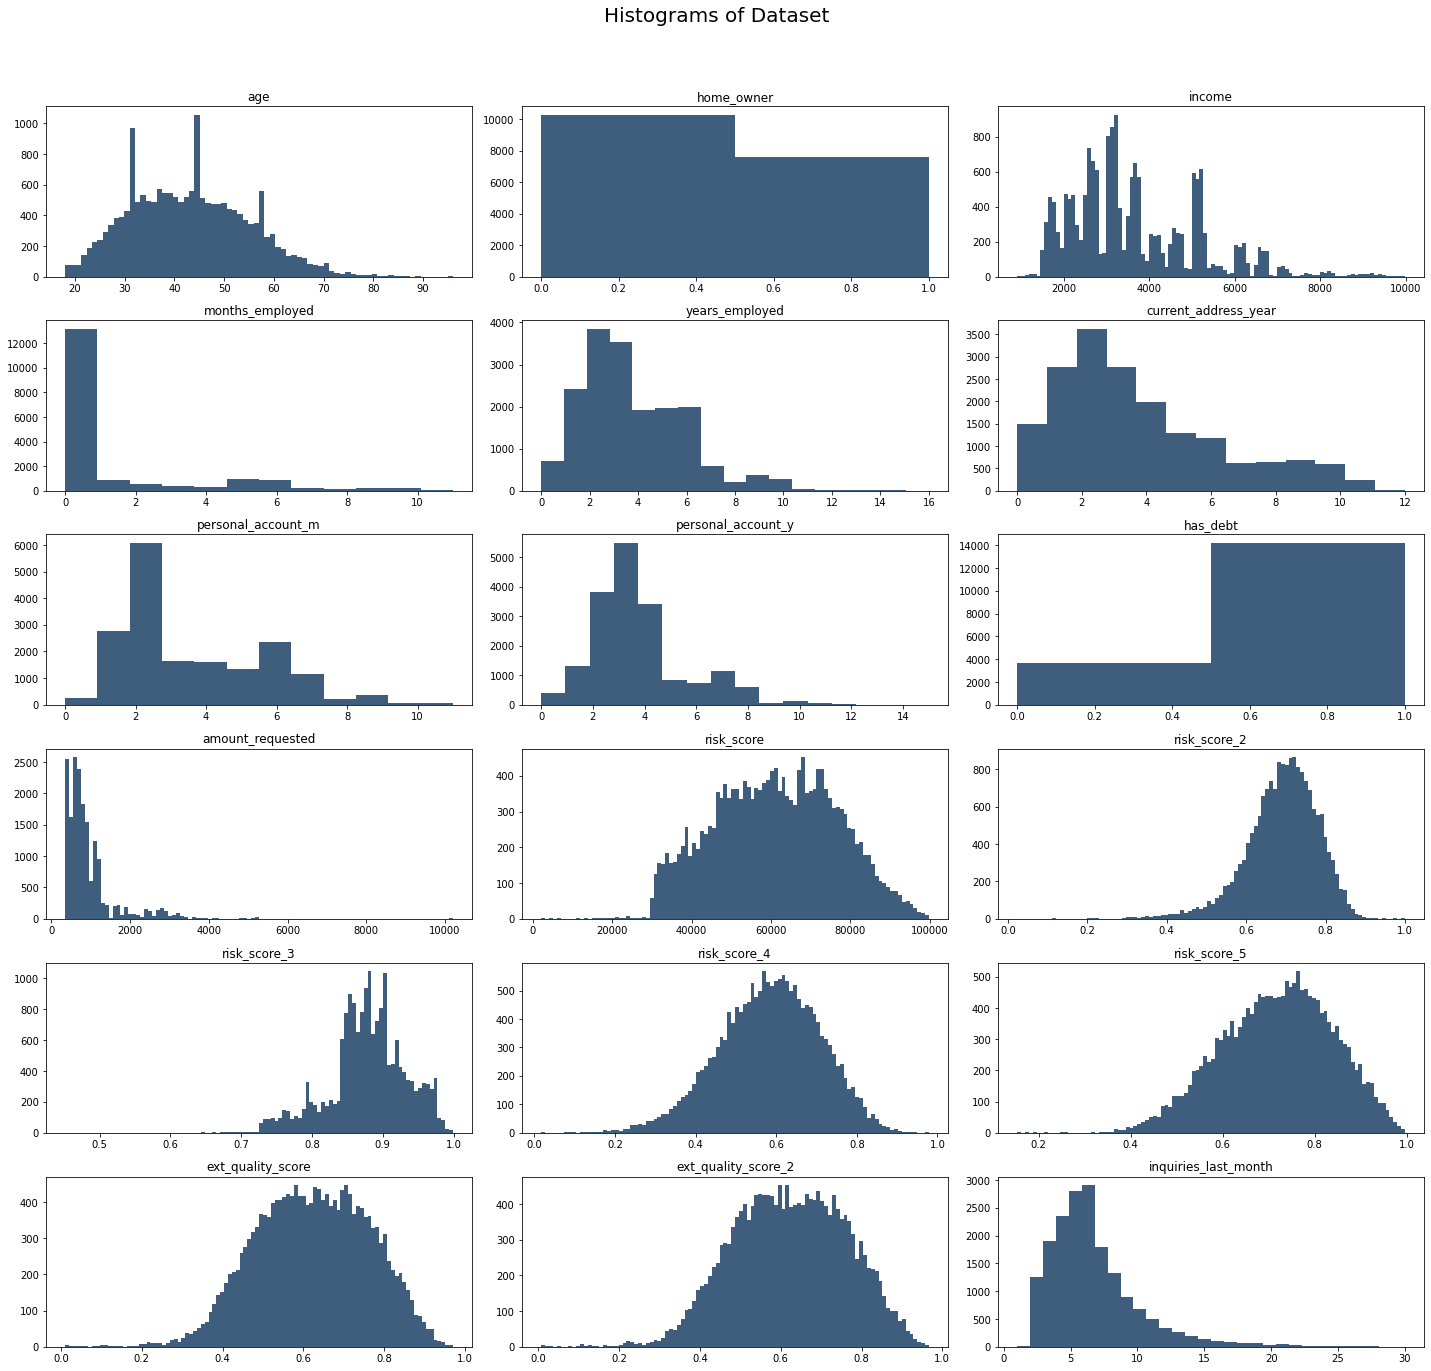

In [51]:

plt.figure(figsize=(20,20) )
plt.suptitle('Histograms of Dataset', fontsize= 20)
for i in range(1, df_temp.shape[1]+1):
    plt.subplot(6,3,i)
    f=plt.gca()
    f.set_title(df_temp.columns.values[i-1])
    
    vals= np.size(df_temp.iloc[:,i-1].unique())
    if vals>=100:
        vals=100
    plt.hist(df_temp.iloc[:,i-1],bins=vals, color= '#3f5d7d')
plt.tight_layout(rect=[0,0.03,1,0.95])


<AxesSubplot:title={'center':'Correlation with response variable(e_signed)'}>

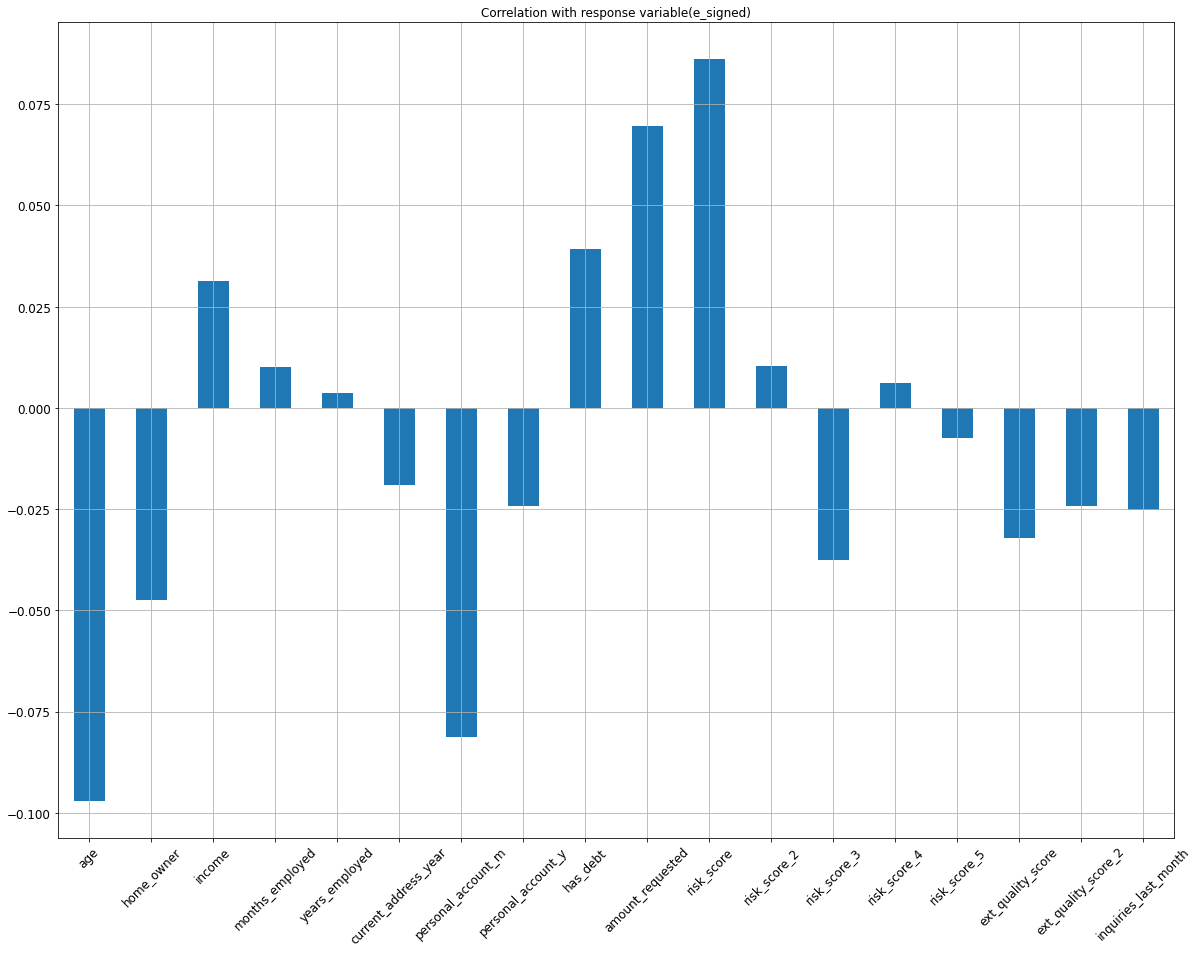

In [102]:
df_temp.corrwith(df.e_signed).plot.bar(figsize=(20,15), rot=45, fontsize=12, grid= True, title= 'Correlation with response variable(e_signed)')

<AxesSubplot:>

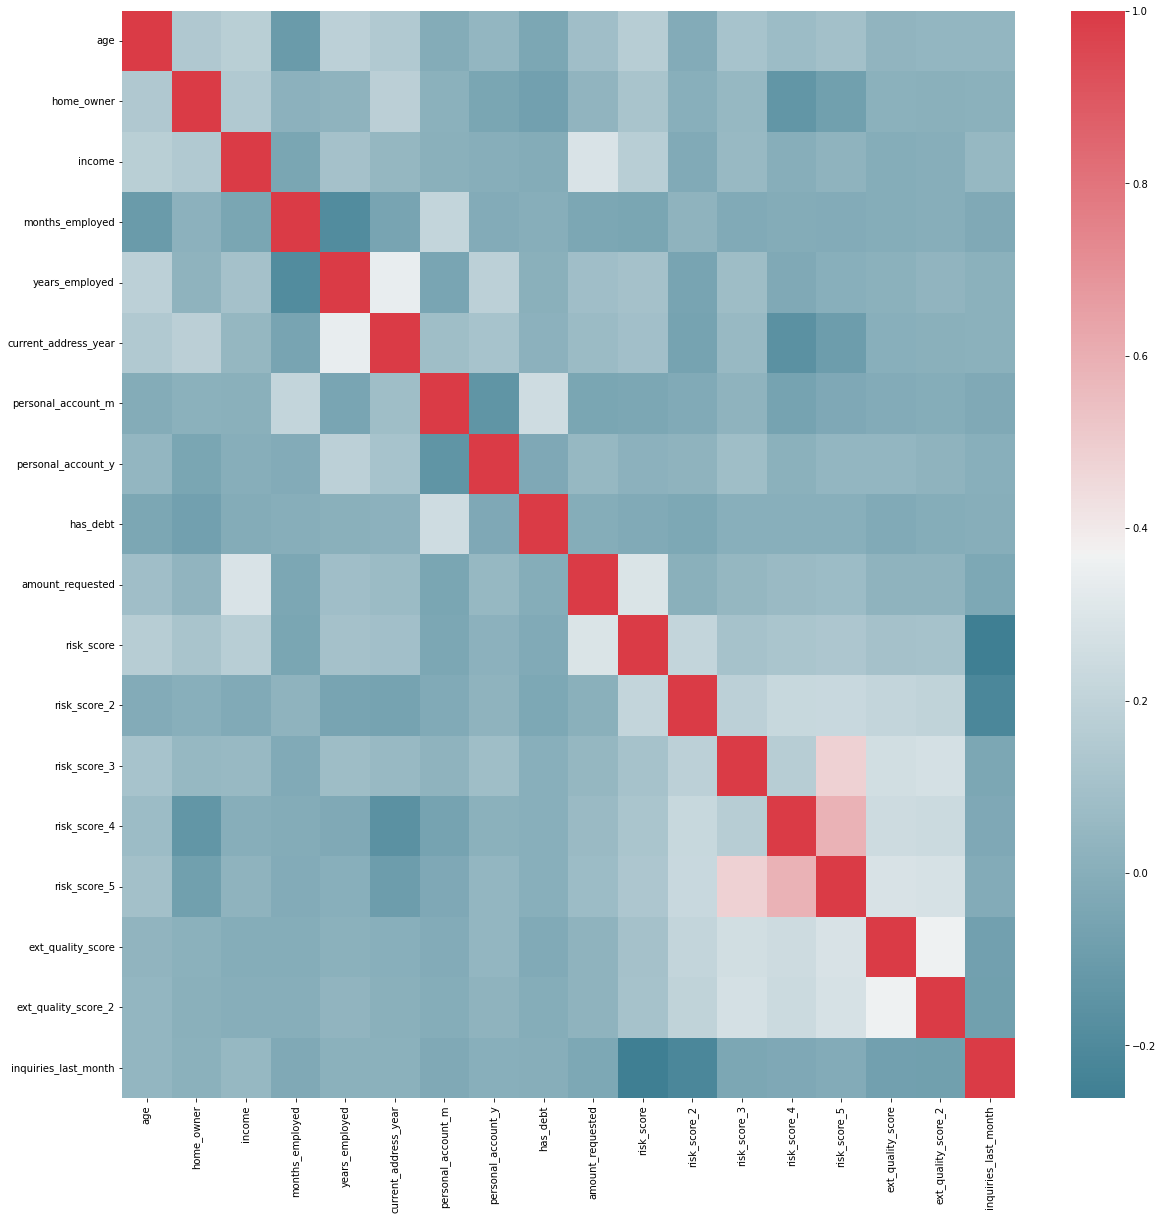

In [68]:
cm= df_temp.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm,cmap= sns.diverging_palette(220,10,as_cmap=True))

## data preprocessing

### feature engineering

In [11]:
df.drop(columns=['months_employed'], inplace=True)

In [12]:
df['personal_account_months']= (df.personal_account_y*12)+ df.personal_account_m 

In [13]:
df.drop(columns=['personal_account_m','personal_account_y'],inplace=True)

In [14]:
df.personal_account_months

0        30
1        86
2        19
3        86
4        98
         ..
17903    74
17904    39
17905    97
17906    18
17907    16
Name: personal_account_months, Length: 17908, dtype: int64

In [15]:
#one-hot

In [16]:
df=pd.get_dummies(df,drop_first=True)

In [17]:
df

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.737398,...,0.487712,0.515977,0.580918,0.380918,10,1,30,0,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.738510,...,0.713423,0.826402,0.730720,0.630720,9,0,86,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.642993,...,0.595018,0.762284,0.531712,0.531712,7,0,19,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.665224,...,0.767828,0.778831,0.792552,0.592552,8,1,86,0,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.617361,...,0.613487,0.665523,0.744634,0.744634,12,0,98,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,0,3245,5,3,1,700,71700,0.691126,...,0.664112,0.838012,0.727705,0.627705,2,0,74,1,0,0
17904,9442442,46,0,6525,2,1,1,800,51800,0.648525,...,0.699241,0.844724,0.774918,0.474918,3,0,39,0,0,0
17905,9857590,46,0,2685,5,1,1,1200,59650,0.677975,...,0.687981,0.939101,0.472045,0.672045,9,0,97,0,0,1
17906,8708471,42,0,2515,3,5,1,400,80200,0.642741,...,0.456448,0.686823,0.406568,0.406568,3,1,18,0,0,0


In [18]:
#removing unnecessary columns

In [19]:
users= df.entry_id
response= df.e_signed

In [20]:
df= df.drop(columns=['e_signed','entry_id'])

In [21]:
##train test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test= train_test_split(df,response, train_size=.80, random_state=0)

In [24]:
#feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler= StandardScaler()

In [27]:
X_train2= pd.DataFrame(scaler.fit_transform(X_train))


In [28]:
X_test2= pd.DataFrame(scaler.transform(X_test))

In [29]:
X_train2.columns= X_train.columns.values
X_test2.columns= X_test.columns.values

In [30]:
X_train=X_train2
X_test=X_test2

In [31]:
X_test

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,-1.013789,-0.856349,-0.242358,-1.124197,-1.302383,0.507058,0.358706,-0.944012,0.548408,-1.076350,0.059153,0.326152,0.314517,-0.399633,0.696555,-0.324231,-0.30236,2.808398,-0.505861
1,-1.013789,-0.856349,-0.335577,-0.237027,-1.302383,-1.972161,-0.213457,0.767226,-0.024644,-0.047016,-0.029979,0.641494,-0.781613,-0.063715,-1.207338,0.195666,-0.30236,-0.356075,-0.505861
2,0.245958,-0.856349,-0.598586,2.868070,0.884094,0.507058,0.215665,0.757484,-1.051686,-0.521003,-1.033452,-1.293930,-0.505566,-0.503429,-0.391384,-0.844128,-0.30236,2.808398,-0.505861
3,0.329941,-0.856349,0.237051,-0.237027,2.341745,0.507058,2.718881,1.264037,-0.268713,-0.313492,-0.381701,1.167423,-0.616575,0.816657,-0.119399,2.361903,-0.30236,-0.356075,1.976827
4,-0.509890,1.167748,3.357207,-0.237027,-0.937970,0.507058,2.790402,1.189353,-0.224014,1.102305,0.237540,0.350924,1.006524,1.007200,-0.663369,-1.364025,-0.30236,2.808398,-0.505861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,0.581891,1.167748,0.070589,-1.124197,-0.209144,0.507058,0.215665,0.523691,0.733104,1.739835,-0.757632,-0.753591,-0.196725,0.520607,-0.935353,-1.190726,-0.30236,2.808398,-0.505861
3578,-1.433705,1.167748,1.171233,2.868070,-0.937970,0.507058,0.287186,-0.119241,-0.062849,0.466213,-0.010543,-0.661026,-1.230819,-1.227981,-0.119399,3.618320,-0.30236,2.808398,-0.505861
3579,-0.089974,-0.856349,-0.412149,1.093729,1.248507,0.507058,-0.355068,-0.372517,1.302741,-0.009006,-1.744279,-1.199745,0.091690,-0.622244,-0.935353,0.368965,-0.30236,-0.356075,-0.505861
3580,-0.257941,-0.856349,-0.255675,0.650144,0.884094,0.507058,0.358706,0.377570,-0.449027,0.199737,-0.362011,-0.726789,-1.491009,-0.772426,-0.663369,0.195666,-0.30236,-0.356075,-0.505861


### model-building

In [32]:
#linear regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [34]:
lr= LogisticRegression()

In [35]:
lr.fit(X_train,y_train)
y_pred_lr= lr.predict(X_test)

In [36]:
accuracy= accuracy_score(y_test, y_pred_lr)
precision= precision_score(y_test, y_pred_lr)
recall= recall_score(y_test, y_pred_lr)
f1= f1_score(y_test, y_pred_lr)

In [37]:
results= pd.DataFrame([['Linear Regression', accuracy, precision, recall, f1]], columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score'])

In [38]:
results

,Model,accuracy,precision,recall,f1-score
0,Linear Regression,0.562256,0.576207,0.705913,0.634499


In [137]:
#linear Regression (LASSO)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [139]:
lr= LogisticRegression(penalty='l1', solver='liblinear')

In [140]:
lr.fit(X_train,y_train)
y_pred_lr_lasso= lr.predict(X_test)

In [141]:
accuracy= accuracy_score(y_test, y_pred_lr_lasso)
precision= precision_score(y_test, y_pred_lr_lasso)
recall= recall_score(y_test, y_pred_lr_lasso)
f1= f1_score(y_test, y_pred_lr_lasso)

In [142]:
model_results= pd.DataFrame([['Linear Regression(LASSO)', accuracy, precision, recall, f1]], columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score'])

In [143]:
results= results.append(model_results)

In [144]:
results

,Model,accuracy,precision,recall,f1-score
0,Linear Regression,0.562256,0.576207,0.705913,0.634499
0,Linear Regression(LASSO),0.562814,0.576630,0.706432,0.634965


In [145]:
#SVC(LINEAR)

In [146]:
from sklearn.svm import SVC

In [147]:
svc=SVC(kernel='linear')

In [148]:
svc.fit(X_train,y_train)
y_pred_svc= svc.predict(X_test)

In [149]:
accuracy= accuracy_score(y_test, y_pred_svc)
precision= precision_score(y_test, y_pred_svc)
recall= recall_score(y_test, y_pred_svc)
f1= f1_score(y_test, y_pred_svc)

In [150]:
model_results= pd.DataFrame([['SVC(LINEAR)', accuracy, precision, recall, f1]], columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score'])

In [151]:
results= results.append(model_results)

In [152]:
results

,Model,accuracy,precision,recall,f1-score
0,Linear Regression,0.562256,0.576207,0.705913,0.634499
0,Linear Regression(LASSO),0.562814,0.576630,0.706432,0.634965
0,SVC(LINEAR),0.568398,0.577832,0.735477,0.647193


In [153]:
#SVC(RBF)

In [154]:
from sklearn.svm import SVC

In [155]:
svc=SVC(kernel='rbf')

In [156]:
svc.fit(X_train,y_train)
y_pred_svc= svc.predict(X_test)

In [157]:
accuracy= accuracy_score(y_test, y_pred_svc)
precision= precision_score(y_test, y_pred_svc)
recall= recall_score(y_test, y_pred_svc)
f1= f1_score(y_test, y_pred_svc)

In [158]:
model_results= pd.DataFrame([['SVC(RBF)', accuracy, precision, recall, f1]], columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score'])

In [159]:
results= results.append(model_results)

In [160]:
results

,Model,accuracy,precision,recall,f1-score
0,Linear Regression,0.562256,0.576207,0.705913,0.634499
0,Linear Regression(LASSO),0.562814,0.576630,0.706432,0.634965
0,SVC(LINEAR),0.568398,0.577832,0.735477,0.647193
0,SVC(RBF),0.597432,0.611162,0.692946,0.649490


In [39]:
#Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf=RandomForestClassifier(n_estimators=100, criterion='entropy')

In [42]:
rf.fit(X_train,y_train)
y_pred_rf= rf.predict(X_test)

In [43]:
accuracy= accuracy_score(y_test, y_pred_rf)
precision= precision_score(y_test, y_pred_rf)
recall= recall_score(y_test, y_pred_rf)
f1= f1_score(y_test, y_pred_rf)

In [44]:
model_results= pd.DataFrame([['RandomForest(n=100)', accuracy, precision, recall, f1]], columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score'])

In [45]:
results= results.append(model_results)

In [46]:
results

,Model,accuracy,precision,recall,f1-score
0,Linear Regression,0.562256,0.576207,0.705913,0.634499
0,RandomForest(n=100),0.630653,0.650873,0.676867,0.663616


In [47]:
#K-folds cross-validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
accuracies= cross_val_score(estimator= rf, X=X_train, y=y_train, cv=10)

In [51]:
print('Random Forest Classifier accuracy: %0.2f(+/- %0.2f)' %(accuracies.mean(), accuracies.std()*2))

Random Forest Classifier accuracy: 0.62(+/- 0.02)


### Parameter Tuning- Grid Search

In [48]:
#Part 1- Entropy

In [50]:
parameters= {'max_depth': [3,None],
             'max_features':[1,5],
             'min_samples_split':[2,5],
             'min_samples_leaf':[1,5],
             'bootstrap': [True,False],
             'criterion': ['entropy']  
}

In [51]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator=rf,
                          param_grid= parameters,
                          scoring='accuracy',
                          cv=5
                         )

In [52]:
grid_search= grid_search.fit(X_train,y_train)

In [53]:
grid_best_accuracy= grid_search.best_score_
grid_best_parameters= grid_search.best_params_

In [55]:
grid_best_accuracy

0.6356277424799874

In [56]:
 grid_best_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [52]:
#part 2- Entropy

In [53]:
parameters= {'max_depth': [None],
             'max_features':[3,5,7],
             'min_samples_split':[8,10,12],
             'min_samples_leaf':[1,2,3],
             'bootstrap': [True],
             'criterion': ['entropy']  
}

In [54]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator=rf,
                          param_grid= parameters,
                          scoring='accuracy',
                          cv=5
                         )

In [55]:
grid_search= grid_search.fit(X_train,y_train)

In [56]:
grid_best_accuracy= grid_search.best_score_
grid_best_parameters= grid_search.best_params_

In [57]:
grid_best_accuracy

0.6346508198058967

In [58]:
 grid_best_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [59]:
y_pred_gs= grid_search.predict(X_test)

In [60]:
accuracy= accuracy_score(y_test, y_pred_gs)
precision= precision_score(y_test, y_pred_gs)
recall= recall_score(y_test, y_pred_gs)
f1= f1_score(y_test, y_pred_gs)

In [61]:
model_results= pd.DataFrame([['Grid Search(n=100, GSX2 + Entropy)', accuracy, precision, recall, f1]], columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score'])

In [62]:
results= results.append(model_results)

In [63]:
results

,Model,accuracy,precision,recall,f1-score
0,Linear Regression,0.562256,0.576207,0.705913,0.634499
0,RandomForest(n=100),0.630653,0.650873,0.676867,0.663616
0,"Grid Search(n=100, GSX2 + Entropy)",0.633166,0.648596,0.695021,0.671007


In [72]:
final_results= pd.concat([y_test,users], axis=1).dropna()


In [73]:
final_results

,e_signed,entry_id
8,1.0,6493191
9,1.0,8908605
12,1.0,6889184
16,0.0,9375601
18,1.0,8515555
...,...,...
17881,1.0,5028251
17888,0.0,8958068
17890,0.0,3605941
17901,0.0,1807355


In [76]:
final_results['predictions']= y_pred_gs

In [78]:
final_results[['entry_id','e_signed','predictions']]

,entry_id,e_signed,predictions
8,6493191,1.0,1
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,1
17890,3605941,0.0,1
17901,1807355,0.0,0
